In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import circle
import cv2
from operator import itemgetter

In [2]:
def Circ(r): #circle
    L = 100
    aperture = np.zeros(shape = (L,L), dtype = float)
    center = (L/2,L/2)
    x, y = circle(*center, r)
    aperture[x, y] = 1
    
    return aperture

def Rec(w,h): #rectangle
    L = 100
    aperture = np.zeros(shape = (L,L), dtype = float)
    center = (L/2,L/2)
    for i in np.arange(center[0]-w//2,center[0]+w//2): #width
        for j in np.arange(center[1]-h//2,center[1]+h//2) : #height
            aperture[int(i)][int(j)] = 1
            
    return aperture

triangle = cv2.imread('triangle.png')
mantigue = cv2.imread('mantigue.png')


In [3]:
c = Circ(40)
cv2.imwrite("circle.png", c)

True

In [4]:
r = Rec(40,40)
cv2.imwrite("rectangle.png", r)

True

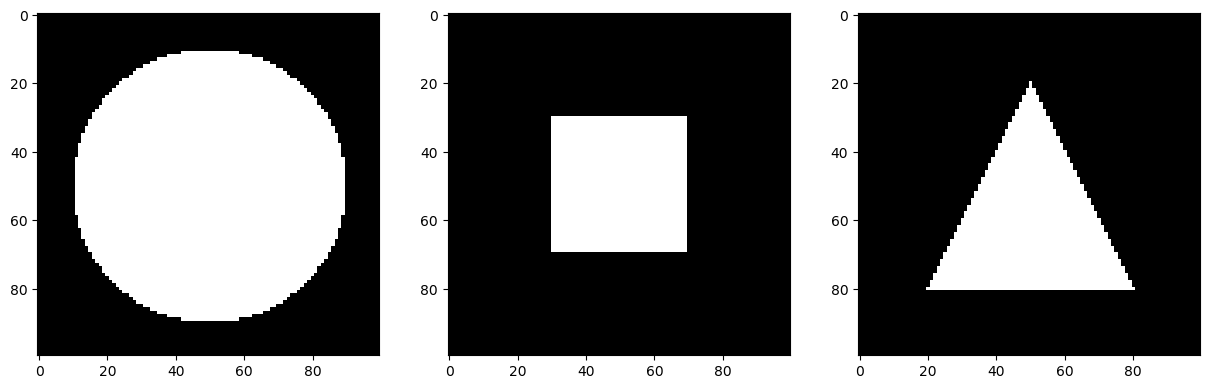

In [9]:
plt.figure(figsize=[15,5], facecolor = 'w', dpi = 100)
plt.subplot(1,3,1)
plt.imshow(c, cmap = 'gray')
plt.subplot(1,3,2)
plt.imshow(r, cmap = 'gray')
plt.subplot(1,3,3)
plt.imshow(triangle)

In [11]:
img1 = cv2.imread('circle.png', 0)
img2 = cv2.imread('rectangle.png', 0)


In [12]:
edge1 = cv2.Canny(img1,0,1)
edge2 = cv2.Canny(img2,0,1)
edge3 = cv2.Canny(triangle,0,1)
edge4 = cv2.Canny(mantigue,0,1)

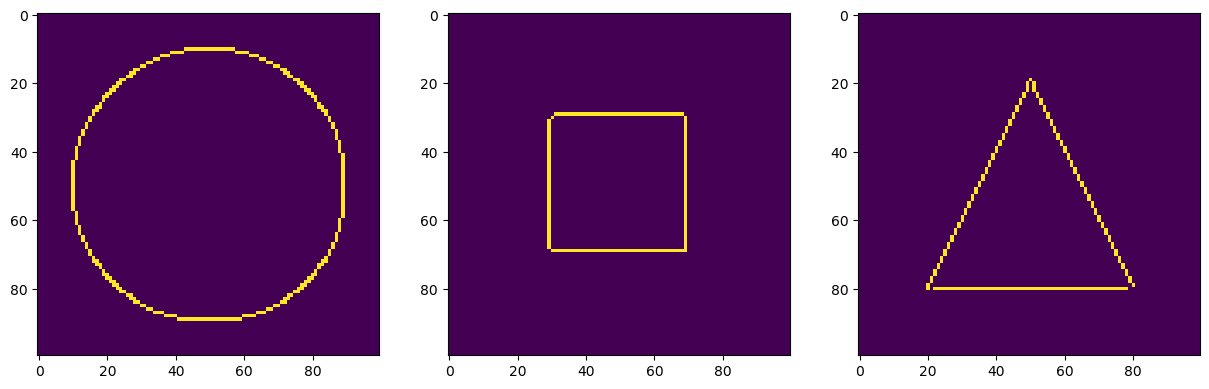

In [13]:
plt.figure(figsize=[15,5], facecolor = 'w',dpi = 100)
plt.subplot(1,3,1)
plt.imshow(edge1)
plt.subplot(1,3,2)
plt.imshow(edge2)
plt.subplot(1,3,3)
plt.imshow(edge3)

In [26]:
plt.rcParams.update({'font.size' : 15})
plt.rcParams['axes.titlesize'] = 18

In [49]:
def Greens(x,y):
    A = []
    for i in range(len(x)-1):
        A.append(((x[i]*y[i+1]-x[i+1]*y[i])))
    return sum(A)/2

def sort(shape):
    dim = np.shape(shape)
    x_org, y_org = dim[0]//2, dim[1]//2
    
    coords = np.where(shape)
    x,y = coords[0], coords[1]
    x_,y_ = coords[0]- x_org, coords[1] - y_org
    
    r = np.sqrt((x_)**2 + (y_)**2)
    theta = np.arctan2(x_, y_)
    
    indices, theta_sorted = zip(*sorted(enumerate(theta), key=itemgetter(1)))

    x_sorted, y_sorted = [],[]

    for i in indices:
        x_sorted.append(x[i])
        y_sorted.append(y[i])
        
    area = np.abs(Greens(x_sorted,y_sorted))

    plt.figure(figsize=[12,5], facecolor = 'w', dpi = 150)
    plt.subplot(1,2,1)
    plt.plot(theta, 'r-', lw = 0.3, label = 'sequence')
    plt.plot(theta, 'b.', label = 'point on edge', alpha = 0.3)
    plt.xlabel('index')
    plt.ylabel('$\Theta$')
    plt.yticks(np.arange(-np.pi,np.pi+0.1,np.pi/2), ["-$\pi$","$\pi$/2","0","$\pi$/2","$\pi$"] )
    plt.grid()
    plt.title("Unsorted")

    plt.subplot(1,2,2)
    plt.plot(theta_sorted, 'r-', lw = 1)
    plt.plot(theta_sorted, 'b.', alpha = 0.3)
    plt.xlabel('index')
    plt.legend(["Sequence", "Point on Edge"])

    plt.yticks(np.arange(-np.pi,np.pi+0.1,np.pi/2), ["-$\pi$","$\pi$/2","0","$\pi$/2","$\pi$"] )

    plt.title("Sorted")
    plt.grid()
    plt.show()
        
    plt.figure(figsize=[12,5], facecolor = 'w', dpi = 150)
    plt.subplot(1,2,1)
    plt.plot(x, y, 'r-', lw = 0.3, label = 'sequence')
    plt.plot(x, y, 'b.', label = 'point on edge', alpha = 0.3)
    plt.xlim(0,dim[0])
    plt.ylim(0,dim[1])
    plt.grid()

    plt.title("Unsorted")
    
    plt.subplot(1,2,2)
    plt.plot(x_sorted, y_sorted, 'r-',lw = 1)
    plt.plot(x_sorted, y_sorted, 'b.', alpha = 0.3)
    plt.title("Sorted")
    plt.xlim(0,dim[0])
    plt.ylim(0,dim[1])
    plt.grid()
    plt.legend(["Sequence", "Point on Edge"])

    plt.annotate('Calculated Area = '+ str(area), 
                 xy =(32,5))
    plt.show()
    
    
    

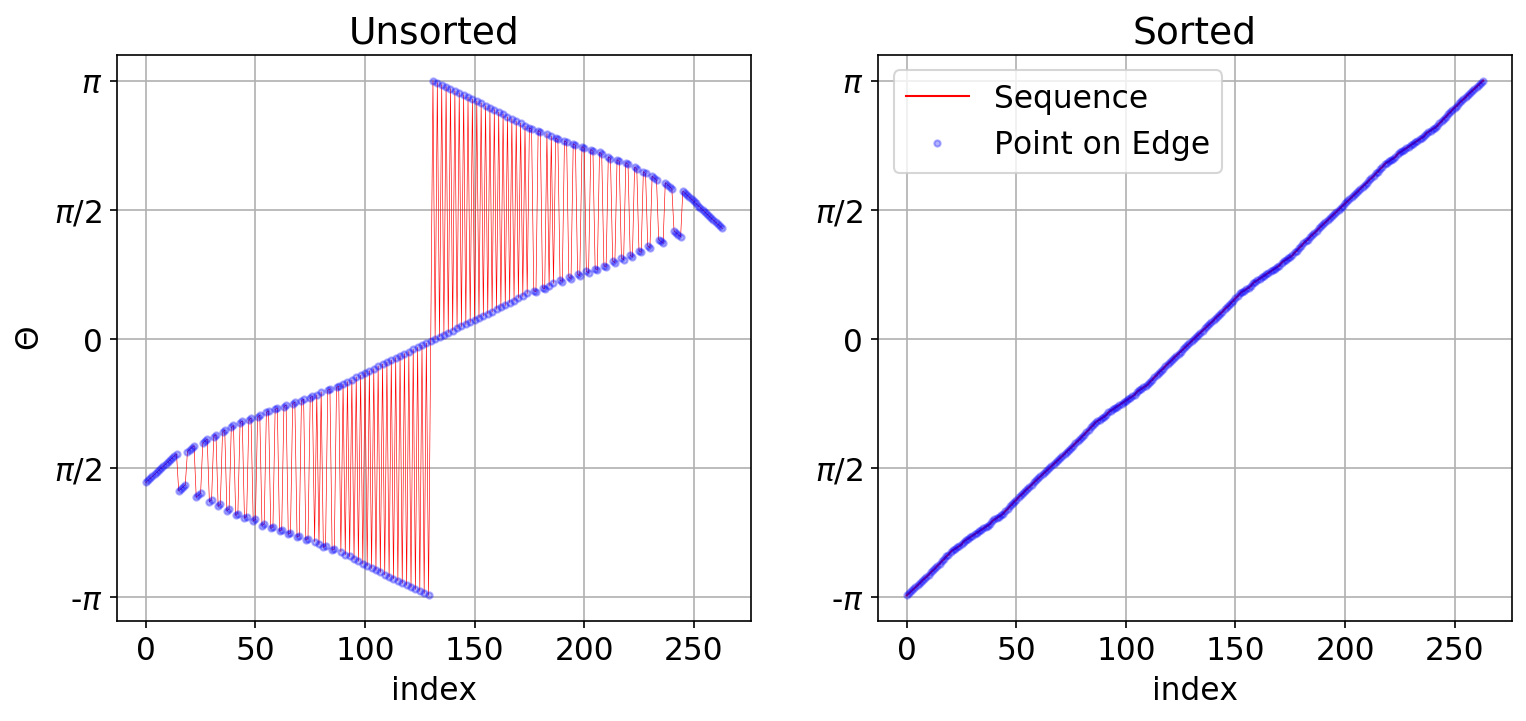

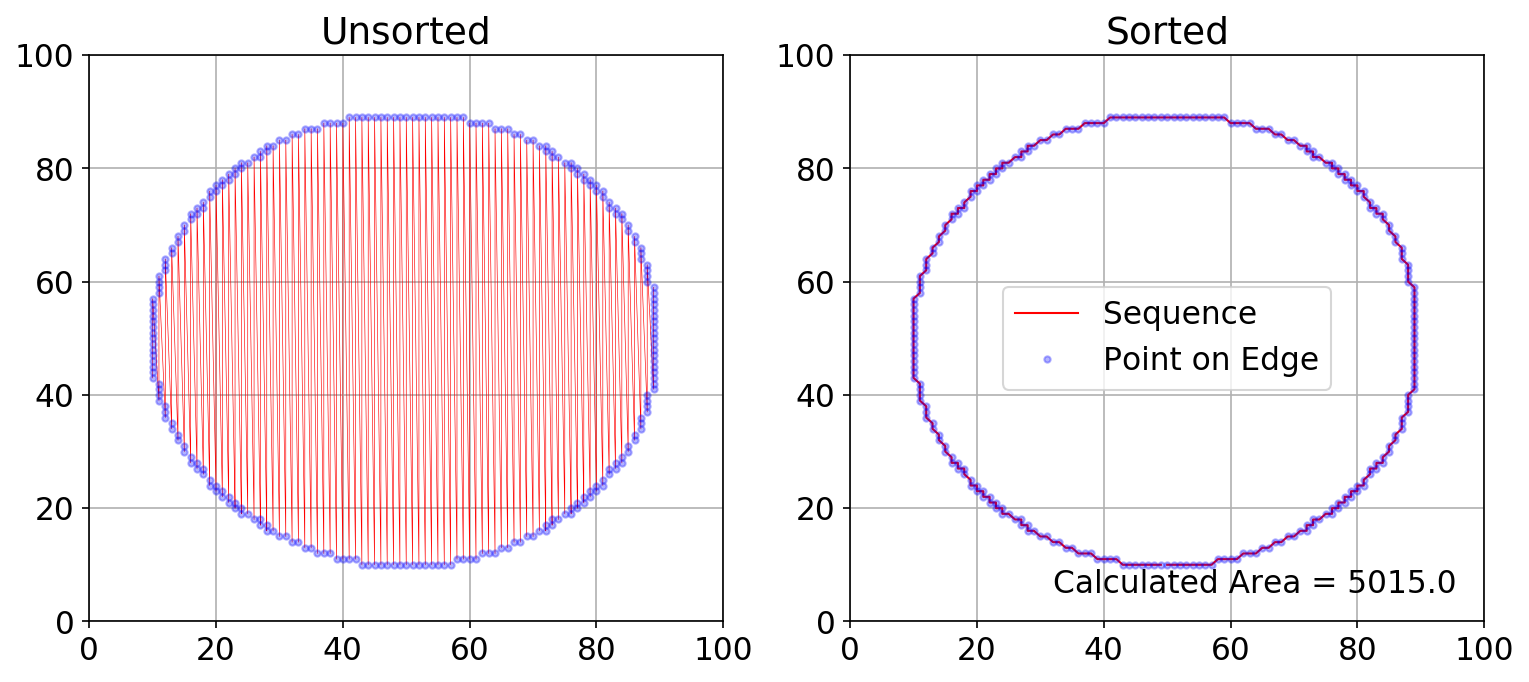

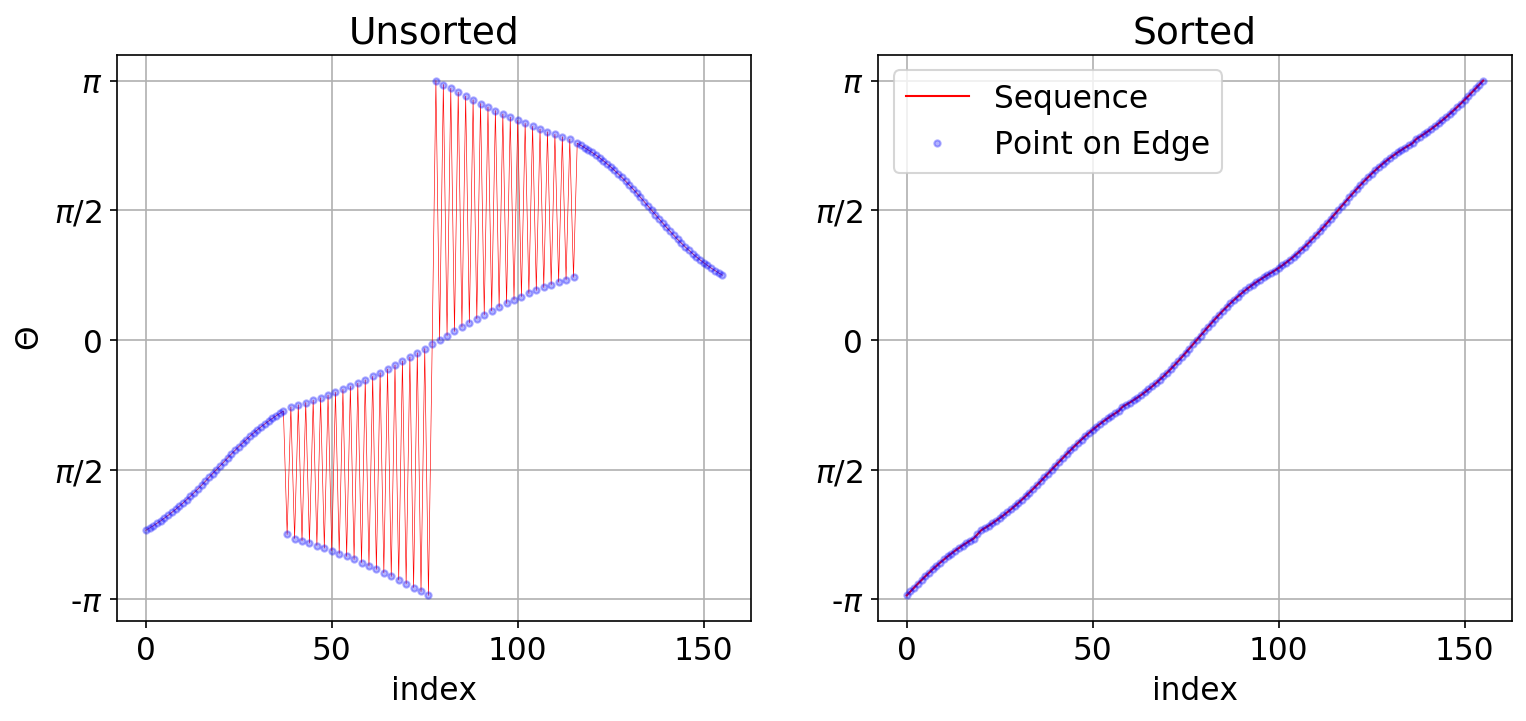

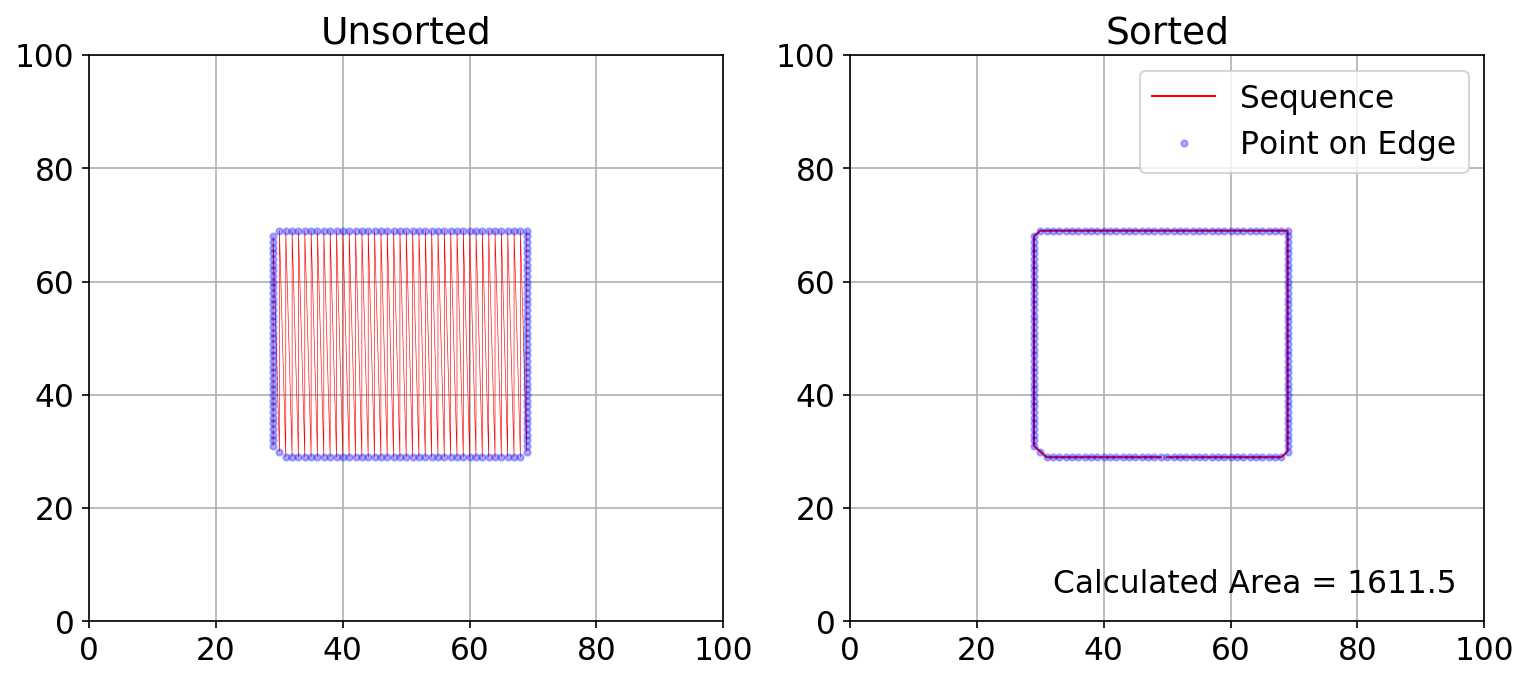

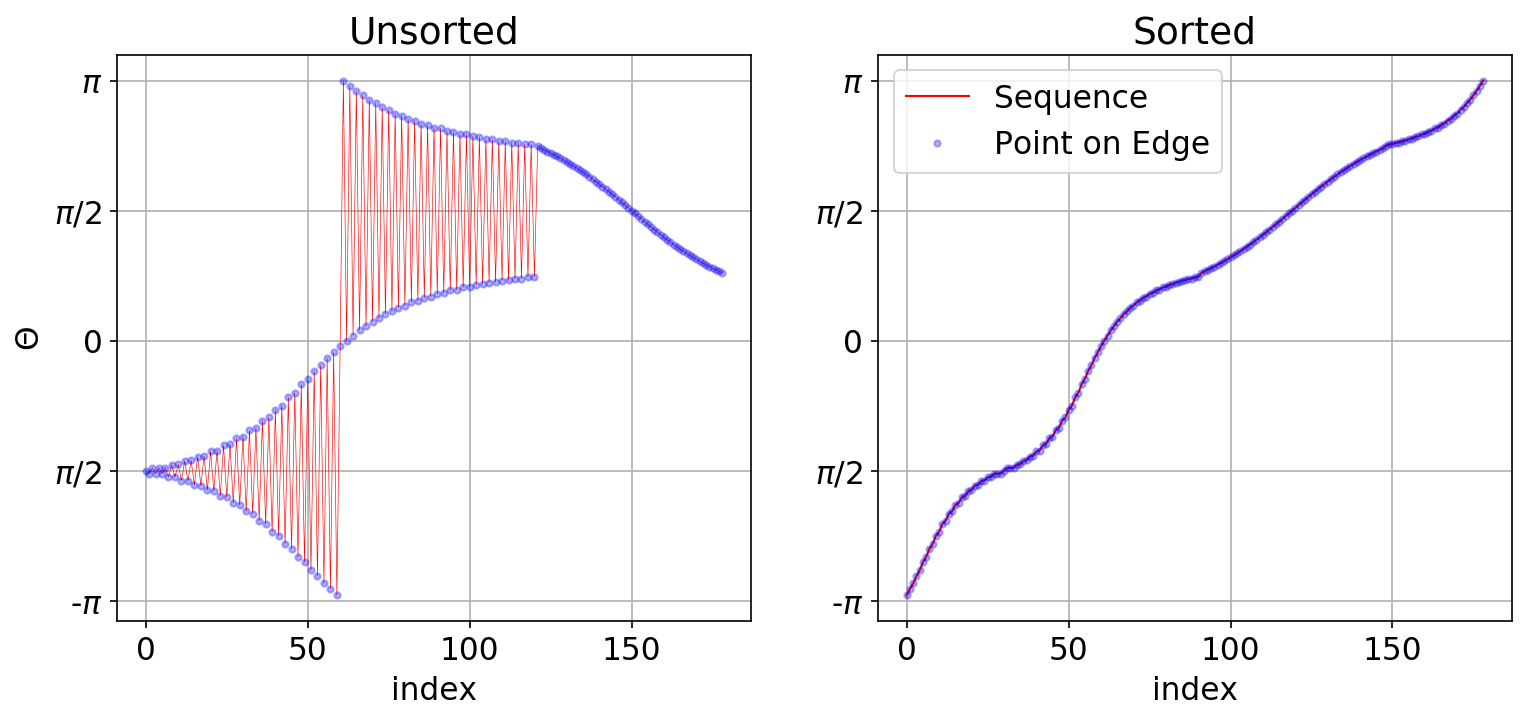

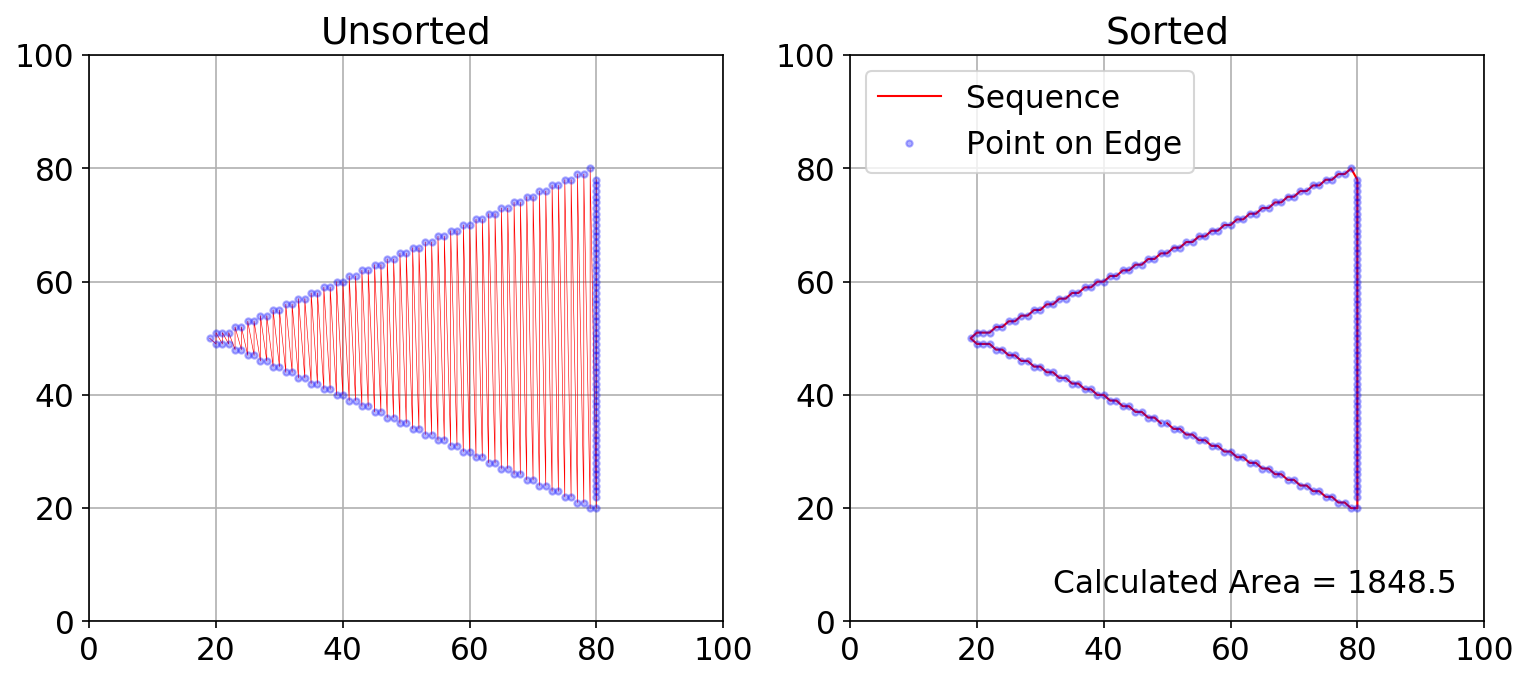

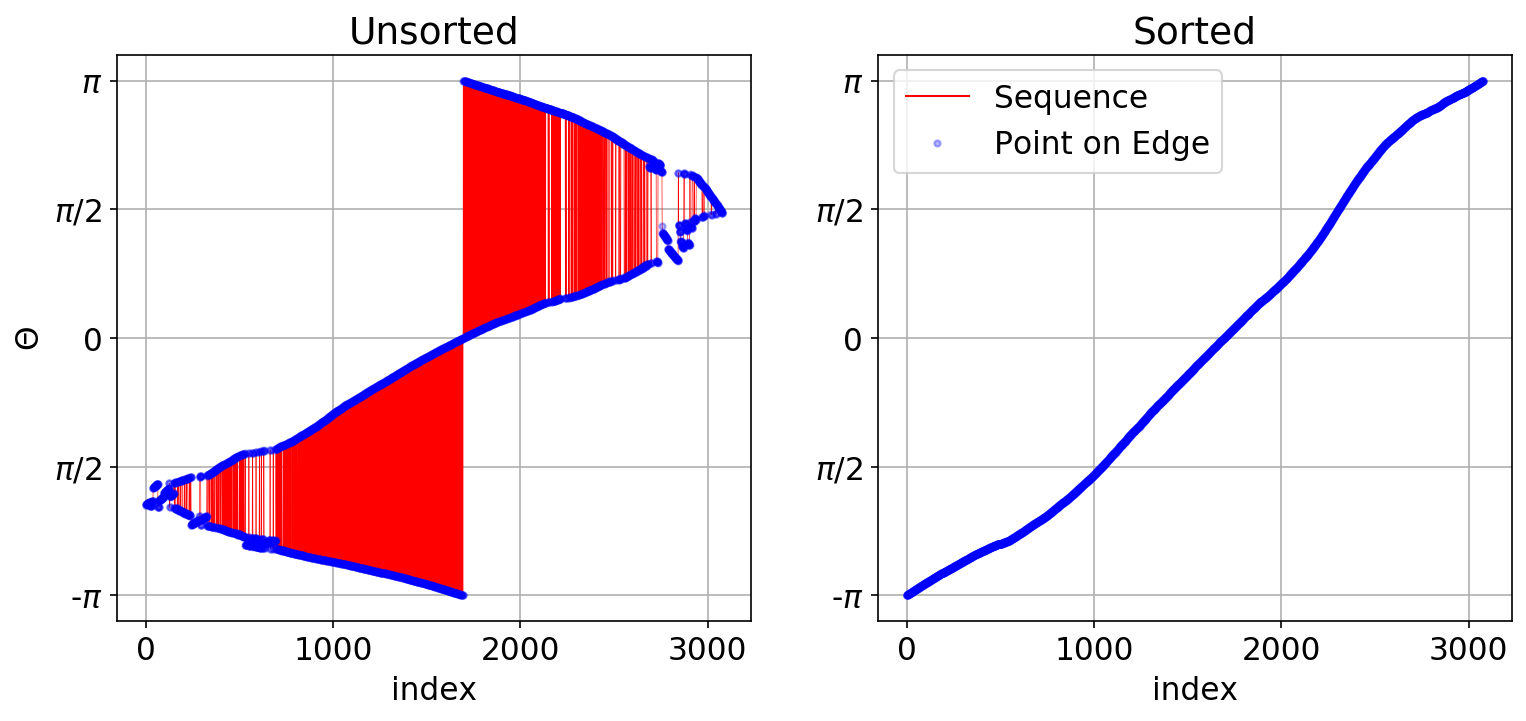

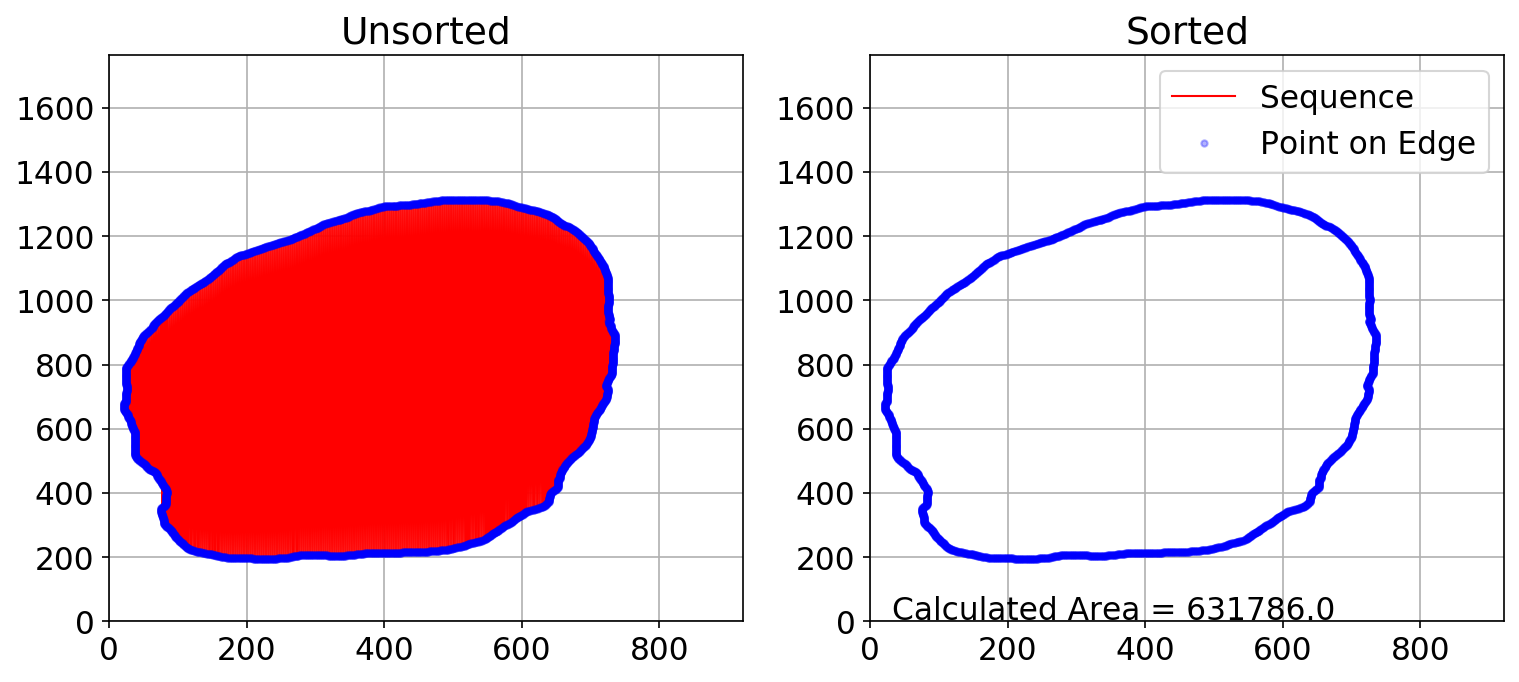

In [50]:
sort(edge1)
sort(edge2)
sort(edge3)
sort(edge4)

In [ ]:
plt.figure(facecolor = 'w')
plt.imshow(mantigue)

In [ ]:
x_org, y_org = 50, 50 
coords = np.where(edge1)
x,y = coords[0], coords[1]
x_,y_ = coords[0]- x_org, coords[1] - y_org

In [ ]:
plt.plot(x, y, '-')
plt.plot(x, y, '.')

In [ ]:
help(np.arctan2)

In [ ]:
r = np.sqrt((x_)**2 + (y_)**2)
theta = np.arctan2(x_, y_)
plt.plot(theta, '.')
plt.plot(theta, '-')
plt.show()
theta

In [ ]:
sorted_theta = np.sort(theta)
plt.plot(sorted_theta)
#?sorted_theta

In [ ]:
from operator import itemgetter

indices, theta_sorted = zip(*sorted(enumerate(theta), key=itemgetter(1)))

x_sorted, y_sorted = [],[]

for i in indices:
    #print(i)
    #x_sorted.append(r[i]*np.cos(theta[i]))
    #y_sorted.append(r[i]*np.sin(theta[i]))
    x_sorted.append(x[i])
    y_sorted.append(y[i])

In [ ]:
#theta_sorted, indices

In [ ]:
plt.figure(figsize=[10,10])
plt.plot(x_sorted, y_sorted, 'r-.', lw = 0.5)
plt.plot(x_sorted, y_sorted, ',')
#plt.xlim(0,100)

In [ ]:
Greens(y_sorted,x_sorted)

In [ ]:
def Greens(x,y):
    A = []
    for i in range(len(x)-1):
        A.append(((x[i]*y[i+1]-x[i+1]*y[i])))
    return sum(A)/2

In [ ]:
628336.5*((20/59)**2)

In [1]:
(20/59)**2

0.11490950876185003